In [1]:
import torch
import math
import matplotlib.pyplot as plt
import torch.nn.functional as F
from data import generate_custom_series

In [ ]:
def plot_generated_series_overlay(components_dict, idx=0):
    """
    Plot full signal and overlaid components using 2x1 layout.
    """
    signal = components_dict["signal"][idx].squeeze().numpy()
    sine = components_dict["sine"][idx].squeeze().numpy()
    trend = components_dict["trend"][idx].squeeze().numpy()
    noise = components_dict["noise"][idx].squeeze().numpy()
    jumps = components_dict["jumps"][idx].squeeze().numpy()

    fig, axes = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

    # Top: full signal
    axes[0].plot(signal, label="Full Signal", color="black")
    axes[0].set_title("Generated Signal")
    axes[0].legend()
    axes[0].grid(True)

    # Bottom: overlayed components
    axes[1].plot(sine, label="Sine", alpha=0.4)
    axes[1].plot(trend, label="Trend", alpha=0.4)
    axes[1].plot(noise, label="Noise", alpha=0.4)
    axes[1].plot(jumps, label="Jumps", alpha=0.4)
    axes[1].set_title("Wave Components")
    axes[1].legend()
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()


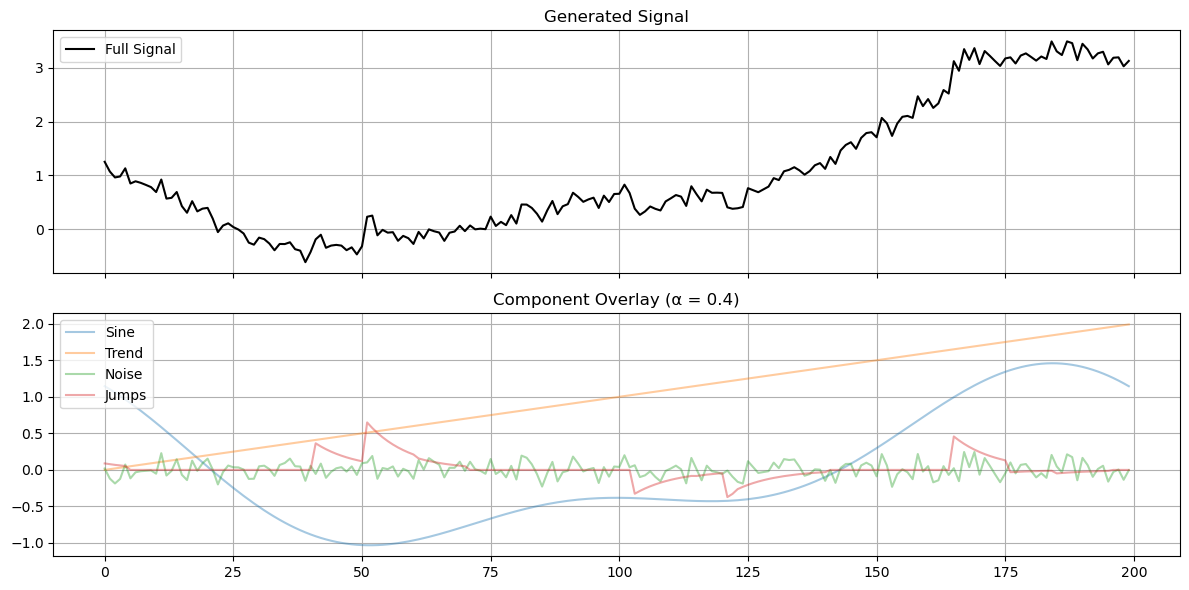

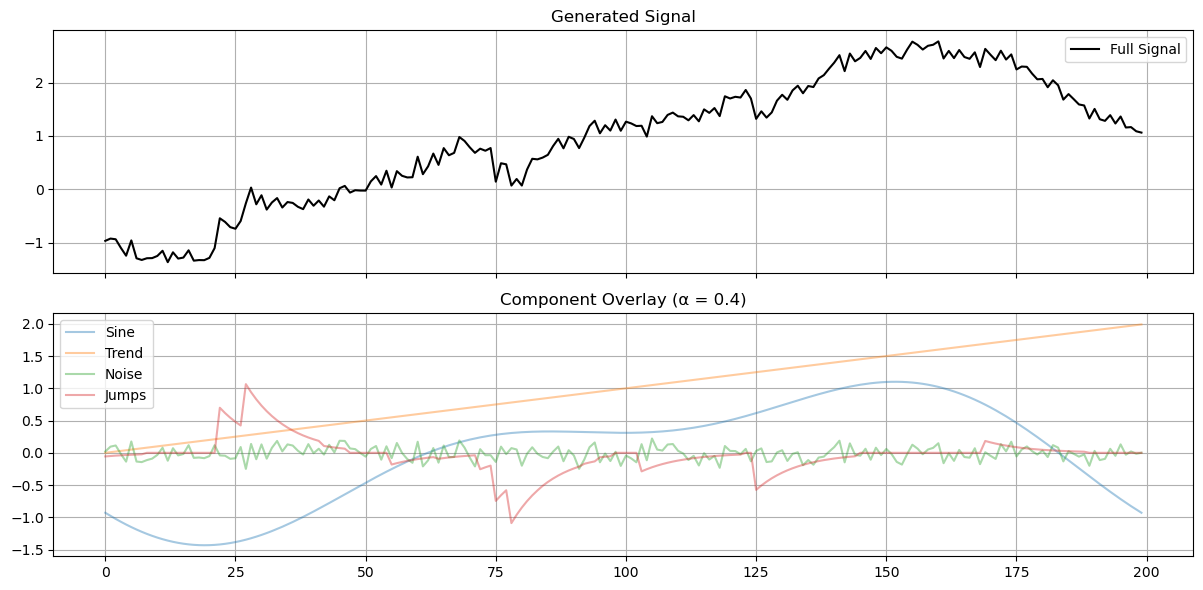

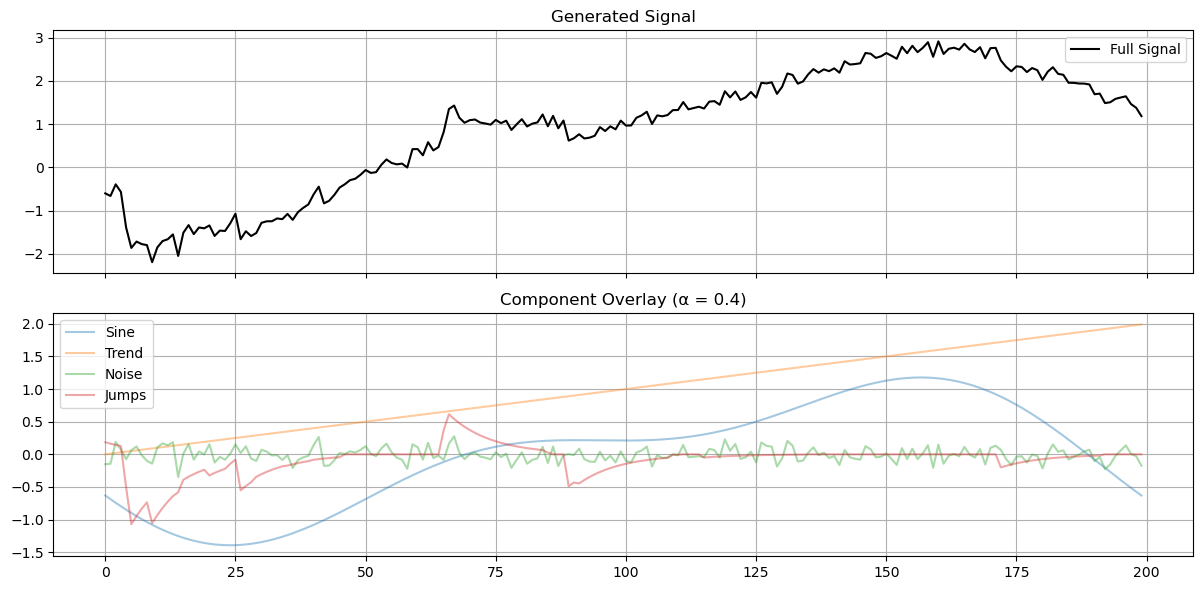

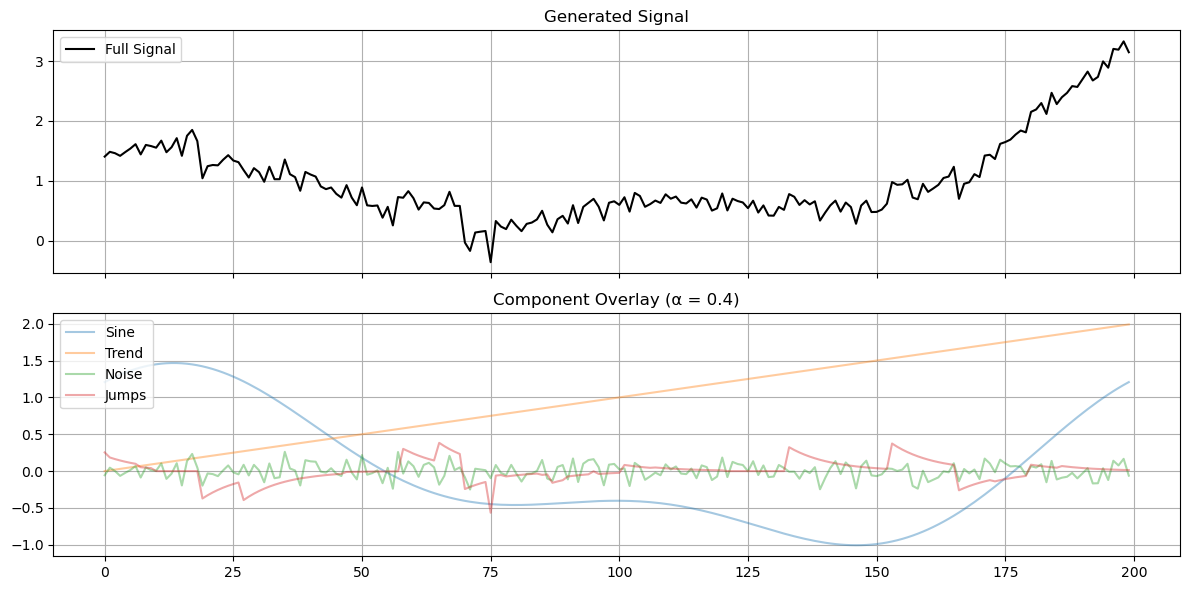

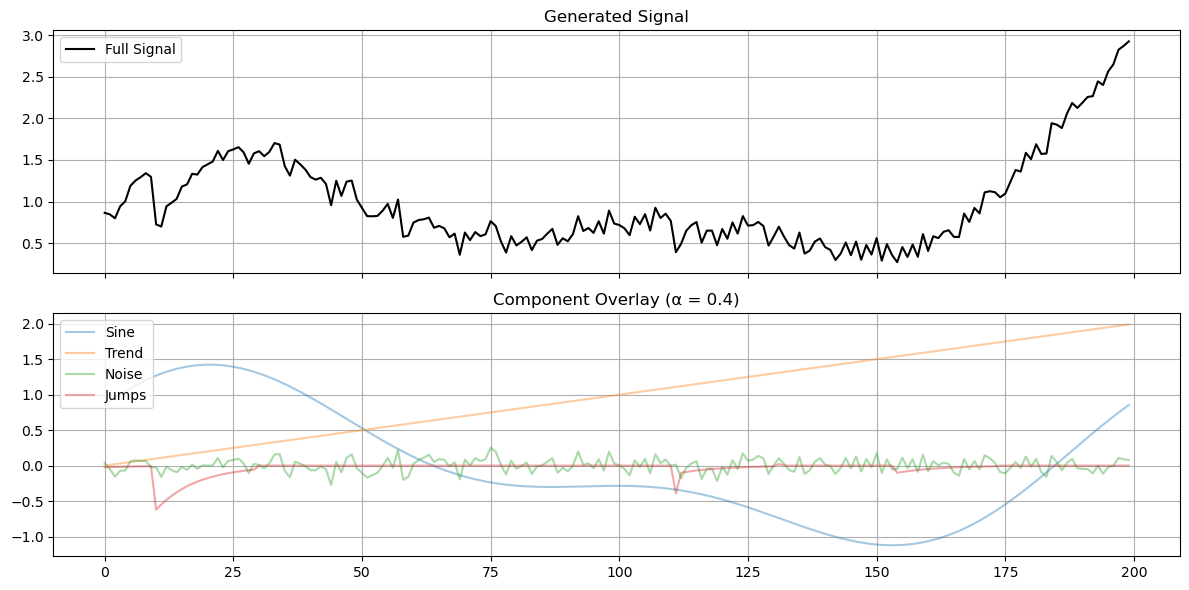

In [3]:
params = {
    "n_samples": 5,
    "total_seq_len": 200,
    "sine_amplitude": 1.0,
    "sine_freq": 1.0,
    "slope": 0.01,
    "trend_type": "linear",
    "noise_std": 0.1,
    "constant_variance": True,
    "seasonality": True,
    "jumps": True,
    "spike_prob": 0.05,        # Higher prob for clearer plots
    "jump_scale": 4.0,
    "jump_tau": 8,
    "return_components": True
}

generated = generate_custom_series(**params)

# Plot each sample
for i in range(params["n_samples"]):
    plot_generated_series_overlay(generated, idx=i)
